## ANZ Data@ANZ Program 

This is from www.theforage.com from the Data@ANZ program 

There are 5 tasks:
    
    -Exploratory Data Analysis (Mandatory)
    -Predictive Analytics (Mandatory)
    -Exploring Big Data
    -Cloud Engineering Core Skills
    -Data Engineering Core Skills

"We are looking to distill unique insights from the data that will enable us to take action. We want to know “what does all this data actually mean for us and our clients, and what should we do next?”


### Some subtasks to be completed
    - Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

    - Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

    - Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

    - Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

    - For a challenge – what insights can you draw from the location information provided in the dataset?

    - Put together 2-3 slides summarising your most interesting findings to ANZ management.

## General analysis for cleaning the data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statistics
import datetime as dt

In [2]:
# Loading the provided excel file
df = pd.read_excel('ANZ_synthesised_transaction_dataset.xlsx', header = 0)



### Loading the dataframe for cleaning

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### Converting data types 

In [5]:
# Changing data types float64 to float32
df[['card_present_flag', 'merchant_code', 'balance', 'amount']] = df[['card_present_flag', 'merchant_code', 'balance', 'amount'
                                                                     ]].astype('float32')

# changing int64 to int 8
df['age'] = df['age'].astype('int8')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float32       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float32       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float32       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int8          
 14  mercha

In [7]:
# The extraction column is in datetime format but is an object datatype
# Changing the date type
df['extraction'] = df['extraction'].apply(pd.to_datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float32            
 2   bpay_biller_code   885 non-null    object             
 3   account            12043 non-null  object             
 4   currency           12043 non-null  object             
 5   long_lat           12043 non-null  object             
 6   txn_description    12043 non-null  object             
 7   merchant_id        7717 non-null   object             
 8   merchant_code      883 non-null    float32            
 9   first_name         12043 non-null  object             
 10  balance            12043 non-null  float32            
 11  date               12043 non-null  datetime64[ns]     
 12  gender             12043 non-null  object     

In [9]:
# dropping the timezone
df['extraction'] = pd.to_datetime(df.extraction).dt.tz_localize(None)

In [10]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float32       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float32       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float32       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int8          
 14  mercha

#### Looking at the dataframe as is, there are at least 2 columns that appear to be NaN values, 'bpay_biller_code' and 'merchant_code'.

In [12]:
# Expanding all columns to check for other possible NaN columns
pd.set_option('max_columns', None)
pd.set_option('min_rows',25)
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.430054,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00,163.000000,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.359985,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04,61.060001,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.750000,2018-08-01,F,43,Melbourne,VIC,2018-08-01 04:11:25,15.610000,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.160004,2018-08-01,F,27,Yokine,WA,2018-08-01 04:40:00,19.250000,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.579987,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00,21.000000,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


There appear no other immediate only NaN value colums

In [13]:
# some information on the dtype, column and row totals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float32       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float32       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float32       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int8          
 14  mercha

In [14]:
# checking for total null values in all of the rows
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

From this information we can notice that two rows are almost entirely null values. out of 12042 rows, 'bpay_biller_code' has 11158 null values and 'merchant_code' has 11160 null values. Both of these rows have nearly 90% missing data. From this we can conclude that these two rows can be dropped.

4 other rows have exactly the same amount of null values and we can explore this a bit further.

In [15]:
# dropping both rows and creating a new dataframe
df1 = df.drop(['bpay_biller_code', 'merchant_code'], axis = 1)
df1

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.430054,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00,163.000000,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kristin,1248.359985,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04,61.060001,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,Kristin,1232.750000,2018-08-01,F,43,Melbourne,VIC,2018-08-01 04:11:25,15.610000,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Tonya,213.160004,2018-08-01,F,27,Yokine,WA,2018-08-01 04:40:00,19.250000,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.579987,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00,21.000000,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [16]:
# checking to see if any currency besides AUD was used
df1[df1['currency'] != 'AUD']

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [17]:
# checking if any purchases were made outside of Australia
df1[df1['country'] != 'Australia']

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


Both of in these searches yielded 0 results which means that all the values in both of the checked columuns are the same. We know that all currency is in AUD and all transactions were made within Australia. These two columns provide no further insight and they can be dropped

In [18]:
# Dropping currency and country columns
df1.drop(['country','currency'], axis = 1, inplace = True)

In [19]:
# Check the resulting dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float32       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float32       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int8          
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  datetime64[ns]
 14  amount

In [20]:
df1.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit


In [21]:
# The transaction_id column seems to be a randomly generated value consisting of letters and numbers. 
# I will check for duplicates to make sure this is the case

dupes = df1.duplicated(subset = 'transaction_id').sum()
dupes

0

There are no matching values in the transaction_id column. This  indicates that the values are all different for each transaction regardles of whether the same customer is making another purchase. So I will drop this column as it will not give us any information.

In [22]:
# dropping the transaction_id column
df1.drop('transaction_id', axis = 1, inplace = True)
df1.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit


In [23]:
# Privacy is important. It appears that the customer_id, first_name and account are all linked 
# Therefore I will drop the name and the account column as we can use the customer_id for analysis 

# first I will group by first_name to check
df1.groupby(['first_name'])['account', 'customer_id'].count()

<ipython-input-23-8349221b96a4>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(['first_name'])['account', 'customer_id'].count()


,account,customer_id
first_name,,
Abigail,102,102
Alexander,91,91
Amy,124,124
Andrew,34,34
Antonio,115,115
Ashley,75,75
Barry,122,122
Billy,77,77
Brian,63,63


As hypothesized, each customer has an account and customer_id linked to their name. 

In [24]:
# dropping the account and first_name columns for privacy purposes
df1.drop(['account', 'first_name'], axis = 1, inplace = True)

In [25]:
df1.head()

,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit


### Back to creating a data frame of the 4 rows with the same null values


In [26]:
equalnull_df = df1[['card_present_flag','merchant_id','merchant_suburb', 'merchant_state','merchant_long_lat' ]]

In [27]:
equalnull_df

,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat
0,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99
1,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87
2,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87
3,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68
4,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06
5,NaN,NaN,NaN,NaN,NaN
6,1.0,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kalkallo,VIC,144.95 -37.53
7,1.0,ee58145d-26e8-4b01-9cd9-62378014f21d,Melbourne,VIC,144.96 -37.81
8,1.0,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Yokine,WA,115.85 -31.9
9,NaN,NaN,NaN,NaN,NaN


In [28]:
# changing the number of rows that appear to look for insight as to why all 4 columns have the same amount of null values
pd.set_option('display.min_rows', 25)
equalnull_df

,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat
0,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99
1,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87
2,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87
3,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68
4,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06
5,NaN,NaN,NaN,NaN,NaN
6,1.0,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Kalkallo,VIC,144.95 -37.53
7,1.0,ee58145d-26e8-4b01-9cd9-62378014f21d,Melbourne,VIC,144.96 -37.81
8,1.0,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Yokine,WA,115.85 -31.9
9,NaN,NaN,NaN,NaN,NaN


Looking at this data, we can tell that all four columns have null values in the same rows. 

--------

### Returning to the original dataframe 

In [29]:
df1

,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,151.22 -33.87,PAYMENT,NaN,1705.430054,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00,163.000000,CUS-2688605418,NaN,debit
6,authorized,1.0,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,1248.359985,2018-08-01,F,43,Kalkallo,VIC,2018-08-01 02:23:04,61.060001,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,1232.750000,2018-08-01,F,43,Melbourne,VIC,2018-08-01 04:11:25,15.610000,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,213.160004,2018-08-01,F,27,Yokine,WA,2018-08-01 04:40:00,19.250000,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,151.23 -33.96,INTER BANK,NaN,466.579987,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00,21.000000,CUS-2031327464,NaN,debit


# 

Looking a little closer it appears that in the status column values with status = posted also have the missing values of the equalnull_df we just looked at. 

In [30]:
# checking to see if column status = posted has a card_present_value of NaN
pd.reset_option('display.min_rows')
df1[df1['status'] == 'posted']


,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
5,posted,NaN,151.22 -33.87,PAYMENT,NaN,1705.430054,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00,163.0,CUS-2688605418,NaN,debit
9,posted,NaN,151.23 -33.96,INTER BANK,NaN,466.579987,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00,21.0,CUS-2031327464,NaN,debit
10,posted,NaN,146.94 -36.04,PAYMENT,NaN,4348.500000,2018-08-01,M,19,NaN,NaN,2018-08-01 06:00:00,27.0,CUS-2317998716,NaN,debit
11,posted,NaN,144.95 -37.76,PAYMENT,NaN,1203.750000,2018-08-01,F,43,NaN,NaN,2018-08-01 06:00:00,29.0,CUS-4123612273,NaN,debit
13,posted,NaN,151.27 -33.76,INTER BANK,NaN,4438.160156,2018-08-01,M,23,NaN,NaN,2018-08-01 07:00:00,25.0,CUS-1462656821,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,144.71 -37.58,PHONE BANK,NaN,13537.750000,2018-10-31,M,27,NaN,NaN,2018-10-31 21:00:00,67.0,CUS-3180318393,NaN,debit
12032,posted,NaN,150.82 -34.01,PAYMENT,NaN,20699.900391,2018-10-31,F,19,NaN,NaN,2018-10-31 22:00:00,33.0,CUS-883482547,NaN,debit
12035,posted,NaN,115.78 -31.90,PAYMENT,NaN,9349.509766,2018-10-31,M,26,NaN,NaN,2018-10-31 23:00:00,29.0,CUS-1646621553,NaN,debit
12036,posted,NaN,145.17 -37.84,PAYMENT,NaN,18127.500000,2018-10-31,M,39,NaN,NaN,2018-10-31 23:00:00,32.0,CUS-1790886359,NaN,debit


From this it appears that all status = posted have the same NaN values for the equalnull_df we created. For now, we will not be dropping these rows because the values from each row in other columns can still be used for insight. I will create a dataframe where all NaN values are dropped. This will get rid of 4326 rows. out of 12402 rows, this is nearly 35% of the data. 

In [31]:
df2 = df1.dropna()
df2

,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,14054.139648,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06,9.790000,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,9137.790039,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46,63.869999,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,45394.570312,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25,43.959999,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,11350.669922,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05,30.770000,CUS-1388323263,145.09 -37.91,debit


# 

In [32]:
# Resetting the index
df2.reset_index(inplace = True)

In [33]:
df2

,index,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,12038,authorized,0.0,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,14054.139648,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06,9.790000,CUS-55310383,145.23 -37.81,debit
7713,12039,authorized,1.0,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,9137.790039,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46,63.869999,CUS-2688605418,150.88 -33.96,debit
7714,12040,authorized,1.0,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,45394.570312,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25,43.959999,CUS-2663907001,150.92 -33.74,debit
7715,12041,authorized,1.0,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,11350.669922,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05,30.770000,CUS-1388323263,145.09 -37.91,debit


There are now two dataframes.

    df1 - contains all rows including NaN

    df2 - contains only rows with non NaN values

Need to save dataframes into csv files so we can call directly and not need to load the entire notebook every time

# Exploratory Data Analysis on df1

    - Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

    - Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

    - For a challenge – what insights can you draw from the location information provided in the dataset?

    - Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [34]:
df1.head()

,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit


#### Splitting the extraction column into dates and times

In [50]:
# year
df1['year'] = df.extraction.dt.year

# month
df1['month'] = df.extraction.dt.month

# day
df1['day'] = df.extraction.dt.day

# hour
df1['hour'] = df.extraction.dt.hour

# minute
df1['minute'] = df.extraction.dt.minute

# second
df1['second'] = df.extraction.dt.second

# day_name
df1['day_name'] = df['date'].dt.day_name()

In [51]:
df1.head()

,status,card_present_flag,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,year,month,day,hour,minute,second,day_name
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.389999,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.250000,CUS-2487424745,153.38 -27.99,debit,2018,8,1,1,1,15,Wednesday
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.200001,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45,14.190000,CUS-2487424745,151.21 -33.87,debit,2018,8,1,1,13,45,Wednesday
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.710000,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.420000,CUS-2142601169,151.21 -33.87,debit,2018,8,1,1,26,15,Wednesday
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.219971,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45,40.900002,CUS-1614226872,153.05 -26.68,debit,2018,8,1,1,38,45,Wednesday
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.950001,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15,3.250000,CUS-2487424745,153.44 -28.06,debit,2018,8,1,1,51,15,Wednesday


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float32       
 2   long_lat           12043 non-null  object        
 3   txn_description    12043 non-null  object        
 4   merchant_id        7717 non-null   object        
 5   balance            12043 non-null  float32       
 6   date               12043 non-null  datetime64[ns]
 7   gender             12043 non-null  object        
 8   age                12043 non-null  int8          
 9   merchant_suburb    7717 non-null   object        
 10  merchant_state     7717 non-null   object        
 11  extraction         12043 non-null  datetime64[ns]
 12  amount             12043 non-null  float32       
 13  customer_id        12043 non-null  object        
 14  mercha

In [53]:
# separating the long_lat column into two new columns
#df['long'] = df['long_lat'].apply(lambda x: x.split('-')[0]).astype('float32')
#df['lat'] = df['long_lat'].apply(lambda x: x.split('-')[1]).astype('float32')


#### We can begin by finding some statistical information for a few columns

In [54]:
# Finding the mean age, amount (per transaction), balance

df1.describe()

,card_present_flag,balance,age,amount,year,month,day,hour,minute,second
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.198242,30.582330,187.933731,2018.0,9.011957,15.862908,13.268621,19.009632,19.912563
std,0.398023,31503.689453,10.046343,592.599426,0.0,0.816511,8.899598,5.777284,19.879112,20.444384
min,0.000000,0.240000,18.000000,0.100000,2018.0,8.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3158.584961,22.000000,16.000000,2018.0,8.000000,8.000000,9.000000,0.000000,0.000000
50%,1.000000,6432.009766,28.000000,29.000000,2018.0,9.000000,16.000000,13.000000,13.000000,14.000000
75%,1.000000,12465.944824,38.000000,53.655001,2018.0,10.000000,24.000000,18.000000,36.000000,38.000000
max,1.000000,267128.531250,78.000000,8835.980469,2018.0,10.000000,31.000000,23.000000,59.000000,59.000000


<AxesSubplot:xlabel='amount'>

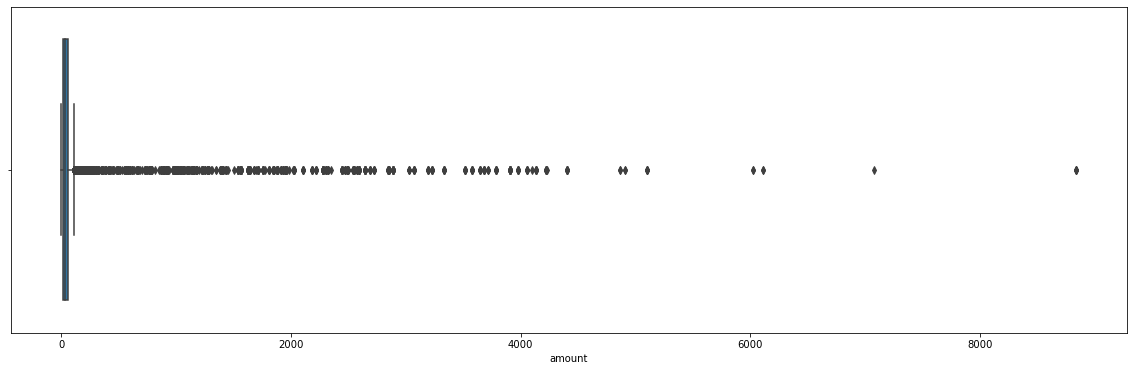

In [55]:
# we can create a boxplot for each feature
plt.figure(figsize=(20,6))
sns.boxplot(df1['amount'])

In [56]:
df1.describe()

,card_present_flag,balance,age,amount,year,month,day,hour,minute,second
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.198242,30.582330,187.933731,2018.0,9.011957,15.862908,13.268621,19.009632,19.912563
std,0.398023,31503.689453,10.046343,592.599426,0.0,0.816511,8.899598,5.777284,19.879112,20.444384
min,0.000000,0.240000,18.000000,0.100000,2018.0,8.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3158.584961,22.000000,16.000000,2018.0,8.000000,8.000000,9.000000,0.000000,0.000000
50%,1.000000,6432.009766,28.000000,29.000000,2018.0,9.000000,16.000000,13.000000,13.000000,14.000000
75%,1.000000,12465.944824,38.000000,53.655001,2018.0,10.000000,24.000000,18.000000,36.000000,38.000000
max,1.000000,267128.531250,78.000000,8835.980469,2018.0,10.000000,31.000000,23.000000,59.000000,59.000000


In [62]:


plt.figure(figsize=(12, 7))
sns.countplot(df['age'],hue=df['gender'], edgecolor='black',linewidth=2)  #double bar graph for age of investments with hue as gender.
plt.title("Count of transactions by age")
plt.figure(figsize=(12, 7))
plt.show()



KeyError: 'day'

<Figure size 864x504 with 0 Axes>

<AxesSubplot:xlabel='age'>

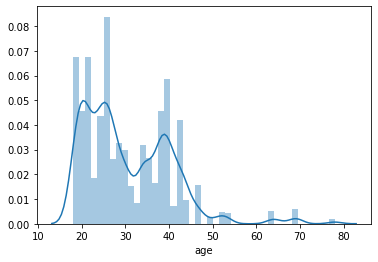

In [58]:
sns.distplot(df1['age'])


In [59]:
sns.countplot(df['day_name'],palette="Set3",linewidth=2,edgecolor='black')
plt.show()

KeyError: 'day_name'